> **Student Names and IDs**:
>
> Newton Kwan, nk150 

# Homework 2

## Part 1: Intuition in Many Dimensions

### Problem 1.1

What is the volume $c(d, a)$ of $C(d, a)$ and, in particular, what is $c(d, 1)$? No need to prove your answers.

### Solution 1.1

$$ \text{Volume of c(d,a)} = a^d$$
$$ \text{Volume of c(d,1)} = 1$$

### Problem 1.2

Give a simple formula for the volume $e(d, \epsilon)$ of $E(d, \epsilon)$ in terms of $d$ and $\epsilon$.

### Solution 1.2

For a unit cube C(d,1), 

$$e(d, \epsilon) = 1 - (1-\epsilon)^d$$

### Problem 1.3

Use the function `matplotlib.pyplot.loglog` to plot $e(d, 10^{-3})$ for $d$ between $1$ and $10^{6}$, and with logarithmic scaling on both axes. Label the axes. 

### Solution 1.3

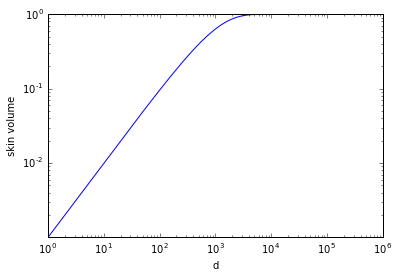

In [16]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

d = np.linspace(1, 10**6, 20000)
def skin_volume(epsilon, d):
    return 1 - (1-epsilon)**d
epsilon = 10**-3
skin_volumes = []
for i in d:
    skin = skin_volume(epsilon, i)
    skin_volumes.append(skin)
    
plt.loglog(d, skin_volumes)
plt.xlabel("d")
plt.ylabel("skin volume")


### Problem 1.4

Write a simple sentence that describes where most of the points in the unit cube are when the number $d$ of dimensions is large and $\epsilon$ is small. What is the approximate numerical value of the fraction of points in the $\epsilon$-skin of the unit cube when $d=2$ and $\epsilon=10^{-3}$?



In [2]:
d =  2
epsilon = 10**-3
skin = skin_volume(epsilon, d)
print(skin)

0.001998999999999973


### Solution 1.4

When the number $\textit{d}$ of dimensions is large and $\epsilon$ is small, most of the points in the unit cube are in the skin i.e. the volume of the skin is very close to 1
<br> 
The approximate numerical value of the fraction of points in the e-skin of the unit cube when $d=2$ and $\epsilon=10^{-3}$ is 
0.001998999999999973

### Problem 1.5

Write a formula for the ratio $r(d)$ between the volume of the unit sphere and that of the 2-cube. Simplify your formula if possible and show your calculations.

### Solution 1.5

The volume of a $\text{unit sphere} = \frac{2\pi^{d/2}}{d \Gamma(d/2)}$ and the volume of a $\text{2-cube} = 2^d$


$$r(d) = \frac{\text{Vol of unit sphere}}{\text{Vol of 2-cube}} = \frac{\frac{2\pi^{d/2}}{d\Gamma(d/2)}}{2^d} = \frac{2^{1-d}\pi^{d/2}}{d\Gamma(d/2)} $$

### Problem 1.6

Plot $r(d)$ (as a regular plot, no logarithms) for every integer $d$ between 1 and 10. Since only integer values of $d$ make sense, draw dots connected by a solid line (that is, specify options `marker='.', markersize=12` for `matplotlib.pyplot.plot`).

### Solution 1.6

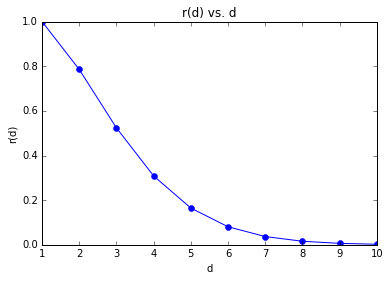

In [3]:
from scipy import special

# Plotting r(d) 

d = range(1, 11) # integers from 1 - 10 inclusive 
def ratio(d):
    top = 2**(1-d) * np.pi**(d/2)
    bottom = d*special.gamma(d/2)
    return top / bottom

ratios = []
for i in d:
    r = ratio(i)
    ratios.append(r)

plt.plot(d, ratios, marker='.', markersize=12, ls='-')
plt.xlabel("d")
plt.ylabel("r(d)")
plt.title("r(d) vs. d")


### Problem 1.7

Approximately what percentage of the volume of a cube is contained in the sphere inscribed the cube when $d=2$? And when $d=10$?

### Solution 1.7 

In [4]:
d2 = 2 
d10 = 10

ratio2 = ratio(d2)
ratio10 = ratio(d10)

print("The percentage of the volume of a cube contained in the sphere inscribed in the cube when d = 2 is {:.3f}".format(ratio2*100),"%")
print("The percentage of the volume of a cube contained in the sphere inscribed in the cube when d = 10 is {:.3f}".format(ratio10*100),"%")

The percentage of the volume of a cube contained in the sphere inscribed in the cube when d = 2 is 78.540 %
The percentage of the volume of a cube contained in the sphere inscribed in the cube when d = 10 is 0.249 %


## Part 2: Loss

### Problem 2.1

The output $y$ to a classifier $h$ is the activity performed by the single person visible in the image $\mathbf{x}$. That person is playing tennis, and the possible activities are _serve_, _forehand_, _backhand_, _volley_, and _other_. The _other_ activity covers any shot that is not of the other types, and any other activity or lack thereof.

> a. If the signature of $h$ is $X\rightarrow Y$, what are $X$ and $Y$, in terms of quantities given in the text for this part?
>
> b. Write the zero-one loss matrix for this classifier.

Label your answers a and b.

To help you with math formatting, here is a small matrix with two rows and two columns:

$$
\left[\begin{array}{cc}
11 & 12 \\
21 & 22
\end{array}\right]
$$

and here is the symbol for set of real numbers: $\mathbb{R}$.

### Solution 2.1.a

$\textit{X}$ is the set of all images $\textbf{x}$ in the training set. In this case, it is a set of black-and-white images with $307,200 = 480 \times 640$ pixels arranged in $480$ rows and $640$ columns.

$$\textit{X} = \{\mathbf{x_1}, ..., \mathbf{x_N}\}$$

where $N$ is the number of training examples

$\textit{Y}$ is the set of all activities performed by the single person visible in the image $\textbf{x}$. In this case, it would be $$\textit{Y} = \{serve, forehand, backhand, volley, other\}$$


### Solution 2.1.b

$$
\ell(y, y')=
\left[\begin{array}{cc}
0 & 1 & 1 & 1 & 1\\
1 & 0 & 1 & 1 & 1\\
1 & 1 & 0 & 1 & 1\\
1 & 1 & 1 & 0 & 1\\
1 & 1 & 1 & 1 & 0\\
\end{array}\right]
$$

### Problem 2.2

> a. Is $h$ a classifier or a regressor?
>
> b. If the signature of $h$ is $X\rightarrow Y$, what are $X$ and $Y$, in terms of quantities given in the text for this part?
>
> c. Why can the loss function not be represented by a matrix for this problem?

### Solution 2.2.a

$\textit{h}$ is a regressor 

### Solution 2.2.b

$\textit{X}$ is the set of all images $\textbf{x}$ in the training set. In this case, it is a set of black-and-white images with $307,200 = 480 \times 640$ pixels arranged in $480$ rows and $640$ columns.

$$\textit{X} = \{\mathbf{x_1}, ..., \mathbf{x_N}\}$$

$\textit{Y}$ is the set of vectors of 25 parameters that describe the tennis player's body configuration in the given image $\textbf{x}$. In this case, it would be $$\textit{Y} = \{\mathbf{y_1}, ..., \mathbf{y_N}\}$$

where $N$ is the number of training examples in the training set

### Solution 2.2.c

We cannot represent the loss function as a matrix for this problem because $\mathit{Y}$ is infinite and structured, therefore a $\mathit{regression}$ problem. In this problem, the output of $\mathit{h}$ is a real-valued vector, in contrast to problem 2.1, where the output is a single value (i.e. serve, forehand, backhand, etc.) whose ordering does not matter (categorical set). 

### Data

In [5]:
import pickle

with open('data.pickle', 'rb') as f:
    data = pickle.load(f)

### Problem 3.1

Write a function `train` with two arguments. The first argument `T` is a training set represented like `data['T']` above. The second argument `k` is a nonnegative integer. The function `train` fits a univariate polynomial of degree `k` to the data in `T`.

Show your code and the result of fitting a polynomial of degree 3 to `data['T']`. Specifically, show the coefficients of the polynomial in decreasing order of degree and with three decimals after the period, and then use the function `show` below (similar to that in homework 1, but using `numpy.polyval`) to plot both training set and polynomial.

### Solution 3.1 

In [6]:
import numpy as np

In [7]:
def train(T, k):
    '''
    This function fits a univariate polynomial of degree k 
    to the data in T
    Input:
    T, a dictionary with keys 'x' and 'y'
    which correspond to x and y of our training set
    k, a nonnegative integer
    '''
    coeffs = np.polyfit(x_data, y_data, k)
    return coeffs


In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def show(x, y, hList = []):
    plt.plot(x, y, marker='.', markersize=12, ls='')
    npt = 100
    xrange = [min(x), max(x)]
    xFine = np.linspace(xrange[0], xrange[1], npt)
    for h in hList:
        hxFine = np.polyval(h, xFine)
        plt.plot(xFine, hxFine, label= 'degree ' + str(len(h)-1))

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

c3 = 0.036
c2 = -0.336
c1 = 0.661
c0 = 0.139


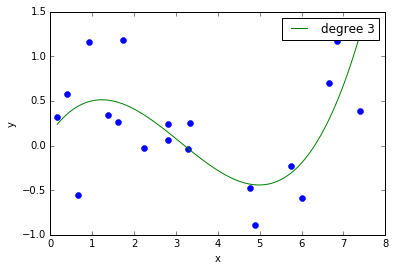

In [9]:
k = 3
T = data['T']
x_data = T['x']
y_data = T['y']
coeffs = train(T, k)
c3 = coeffs[0]
c2 = coeffs[1]
c1 = coeffs[2]
c0 = coeffs[3]
print("c3 = {:.3f}".format(c3))
print("c2 = {:.3f}".format(c2))
print("c1 = {:.3f}".format(c1))
print("c0 = {:.3f}".format(c0))
show(x_data, y_data, [coeffs])

### Problem 3.2

Write a function `loss(y, yp)` that takes the true value `y` and the predicted value `yp` for a regression problem and returns the quadratic loss $\ell(y, y') = (y - y')^2$. The arguments are `numpy` arrays of equal size, and the output is an array of the same size with all of the losses.

Then write a function `L(h, T, l)` that takes a `numpy` vector `h` of polynomial coefficients, a training set `T` represented as a dictionary with entries `x` and `y` as shown earlier, and a loss function `l` of the same signature as `loss`, and computes the empirical risk of `h` on `T` with loss `l`:

$$
L_T(h) = \frac{1}{N} \sum_{n=1}^N \ell(y_n, h(x_n))
$$

where $N$ is the number of samples in $T$.

Show your code and the numerical value of the empirical risk for the fit in problem 3.1. Use three decimal digits after the period.

### Solution 3.2 

In [10]:
def loss(y, yp):
    '''
    This functions returns an array of losses 
    Input: 
    y, an array of the true value 
    yp, an array of the predicted values 
    Output: 
    loss, an array of losses
    '''
    
    loss = np.square(y - yp)
    return loss

In [11]:
def L(h, T, l):
    '''
    This computes the empirical risk of h on T with loss l 
    Inputs:
    h, a numpy vector of polynomial coefficients
    T, a dictionary representation of the training set with entries x and y 
    l, a loss function of the same signature as loss 
    Outputs: 
    risk, the empirical risk of h on T with loss l 
    '''
    x_data = T['x']
    y_data = T['y']
    yp = np.polyval(h, x_data)
    l = loss(y_data, yp)
    risk = np.mean(l)
    return risk


In [12]:
y = T['y']                   # true values y 
x = T['x']                   # true values x 
yp = np.polyval(coeffs, x)   # predicted values yp
l = loss(y, yp)              # quadratic loss 
k = 3                        # polynomial degree 
T = data['T']                # training data 
h = train(T, k)              # polynomial coefficients
risk = L(h, T, l)            # emperical risk 
print("Empirical risk = {:.3f}".format(risk))

Empirical risk = 0.207


### Problem 3.3

Make a figure that superimposes two plots in the same diagram, each plot represented as a sequence of dots conencted by lines (as in the function `show` above).

The first plot is the _training risk_, that is, the empirical risk on `data['T']` for the fit in problem 3.1 but for polynomial degrees $k = 0,\ldots, 12$, using the quadratic loss. The second plot is the _validation risk_, that is, the analogous quantity estimated on `data['V']` (of course, for both plots the polynomials are trained on `data['T']`).

Label the axes of the figure as "k" and "risk" and place a legend that specifies which plot is which.

Show both code and plot.

### Solution 3.3 

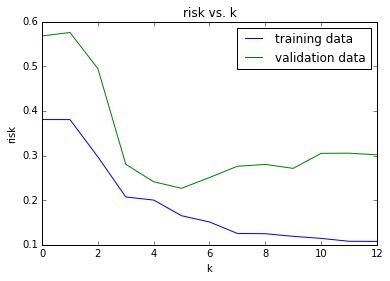

In [13]:
T = data['T']         # Training data
V = data['V']         # Validation data 
y_t = T['y']          # Y of training data 
x_t = T['x']          # X of training data
y_v = V['y']          # Y of validation data
x_v = V['x']          # X of validation data 
t_risk = []
v_risk = []
for k in range(0, 13):
    h = train(T, k)
    yp_t = np.polyval(h, x_t)
    yp_v = np.polyval(h, x_v)
    l_t = loss(y_t, yp_t)
    l_v = loss(y_v, yp_v)
    risk_t = L(h, T, l_t)
    risk_v = L(h, V, l_v)
    t_risk.append(risk_t)
    v_risk.append(risk_v)


plt.plot(range(0, 13), t_risk, label= 'training data')
plt.plot(range(0, 13), v_risk, label= 'validation data')
plt.xlabel("k")
plt.ylabel("risk")
plt.title("risk vs. k")
plt.legend(loc = "upper right")

### Problem 3.4

For what value $k^{\star}$ of $k$ does the fit generalize best to the validation data? Also use the function `show` to display the validation points and the fit to the training data for $k^{\star}$.

### Solution 3.4

In [14]:
differences = []
for i in range(0, 13):
    diff = np.linalg.norm(t_risk[i] - v_risk[i])
    differences.append(diff)


print("The value of k in which the fit generalizes best is when the difference of t_risk and v_risk is smallest")
print("The smallest difference between is {:.3}".format(min(differences)))
print("This occurs at k =", differences.index(min(differences)))
print("Therefore, k* = 4")

The value of k in which the fit generalizes best is when the difference of t_risk and v_risk is smallest
The smallest difference between is 0.0409
This occurs at k = 4
Therefore, k* = 4


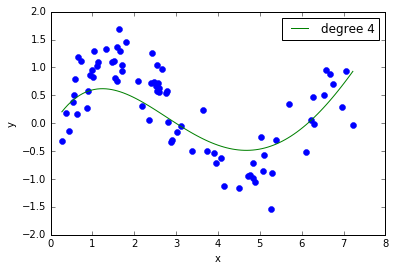

In [15]:
# Plot of k = 4 and validation data 
k = 4                 # k*
V = data['V']         # Validation data 
y_v = V['y']          # Y of validation data
x_v = V['x']          # X of validation data 
h = train(V, k)
show(x_v, y_v, [h])

### Problem 3.5

Why is the plot for the training risk in problem 3.3 monotonic non-increasing? (If your plot doesn't look that way, you may want to review your solution to 3.3.) Explain briefly and clearly.

### Solution 3.5
The training risk is monotonic non-increasing because as we increase k, we are approaching a function that will exactly fit all of the points in the training data. In other words, the risk will continue to decrease because we are fitting a better and better polynomial to the training data, eventually getting to an exact fit when N is sufficiently close to the number of training examples. Unfortunately, this is not very useful in machine learning because we want our function to generalize i.e. work on previously unseen data. This is the reason why we tried many values of k and compare them to the validation training data: we wanted to see which degree polynomial would generalize best i.e. have the smallest difference between training risk and validation risk. 

### Problem 3.6

There are two technical terms that denote the fact that the validation risk is (i) higher for $k < k^{\star}$ and (ii) higher for $k > k^{\star}$, when compared to the validation risk at $k^{\star}$. What are the two terms? Specify which term is for which case ((i) or (ii)).

### Solution 3.6
(i) Underfitting (high bias) 
<br> 
(ii) Overfitting (high variance) 